<a href="https://colab.research.google.com/github/mattyco/Critical-Analysis-of-DES-and-Blowfish/blob/master/desvsblowfish(cfb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1
Blowfish Python

In [0]:
pip install pycryptodome

     |████████████████████████████████| 13.7MB 309kB/s 


In [0]:
from Crypto.Cipher import Blowfish
from struct import pack
import os, random
import binascii
import time

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path ='/content/drive/My Drive/CompSec/'

In [0]:
bs = Blowfish.block_size
bskey = b'01234567'
bfobj = Blowfish.new(bskey, Blowfish.MODE_CFB)

In [0]:
def encrypt_bf_file(bs, key, in_filename, out_filename=None):
    if not out_filename:
        out_filename = in_filename + '.enc'
    size = os.path.getsize(in_filename)
    infile = open(in_filename, 'rb')
    outfile = open(out_filename, 'wb')
    data = infile.read()
    infile.close()
    if size % bs > 0:  # Add padding if size if not divisible by 8
        extra = bs-(size % bs)
        padding = [0]*extra
        padding = pack('b'*extra, *padding)
        data += padding
    start_time=time.time()
    encrypted_data = bfobj.iv + bfobj.encrypt(data)
    end_time=time.time()
    outfile.write(encrypted_data)
    outfile.close()
    return (end_time - start_time)

In [0]:
def decrypt_bf_file(key, in_filename, out_filename):
    infile = open(in_filename, 'rb')
    outfile = open(out_filename, 'wb')
    data = infile.read()
    infile.close()
    iv = data[:bs]
    data = data[bs:]
    start_time=time.time()
    bfobjnew = Blowfish.new(key, Blowfish.MODE_CFB, iv)
    decrypted_data = bfobjnew.decrypt(data)
    end_time=time.time()
    end = len(decrypted_data) - 1
    while binascii.hexlify(bytes(str(decrypted_data[end]), 'utf-8')) == '00':
        end -= 1
    decrypted_data = decrypted_data[0:end]
    outfile.write(decrypted_data)
    outfile.close()
    return(end_time - start_time)

In [0]:
def findbfavgtime(bs,key,filename):
  avg_enc_time=0
  avg_dec_time=0
  for i in range(10):
    time_taken_enc=encrypt_bf_file(bs,key, path + filename)
    time_taken_dec=decrypt_bf_file(key, path + filename + ".enc",path + 'out.txt')
    # print(time_taken)
    avg_enc_time+=time_taken_enc
    avg_dec_time+=time_taken_dec
    # time.sleep(2)

  avg_enc_time*=100
  avg_dec_time*=100
  return(avg_enc_time,avg_dec_time)

#Section 2
DES Python
Key size 64 bit.
ECB Mode (Electronic Code Book)

In [0]:
from Crypto.Cipher import DES
import time

In [0]:
desbs = DES.block_size
deskey=b'01234567'
desobj = DES.new(deskey, DES.MODE_CFB)

In [0]:
def encrypt_des_file(bs,key, in_filename, out_filename=None):
    if not out_filename:
        out_filename = in_filename + '.enc'
    size = os.path.getsize(in_filename)
    infile = open(in_filename, 'rb')
    outfile = open(out_filename, 'wb')
    data = infile.read()
    infile.close()
    if size % bs > 0:  # Add padding if size if not divisible by 8
        extra = bs-(size % bs)
        padding = [0]*extra
        padding = pack('b'*extra, *padding)
        data += padding
    start_time=time.time()
    encrypted_data = desobj.iv + desobj.encrypt(data)
    end_time=time.time()
    outfile.write(encrypted_data)
    outfile.close()
    return (end_time - start_time)

In [0]:
def decrypt_des_file(key, in_filename, out_filename):
    infile = open(in_filename, 'rb')
    outfile = open(out_filename, 'wb')
    data = infile.read()
    infile.close()
    iv = data[:desbs]
    data = data[desbs:]
    start_time=time.time()
    desobjnew = DES.new(key, DES.MODE_CFB, iv)
    decrypted_data = desobjnew.decrypt(data)
    end_time=time.time()
    end = len(decrypted_data) - 1
    while binascii.hexlify(bytes(str(decrypted_data[end]), 'utf-8')) == '00':
        end -= 1
    decrypted_data = decrypted_data[0:end]
    outfile.write(decrypted_data)
    outfile.close()
    return(end_time - start_time)


In [0]:
def finddesavgtime(bs,key,filename):
  avg_enc_time=0
  avg_dec_time=0
  for i in range(10):
    time_taken_enc=encrypt_des_file(bs,key, path + filename)
    time_taken_dec=decrypt_des_file(key, path + filename + ".enc",path + 'out.txt')
    # print(time_taken)
    avg_enc_time+=time_taken_enc
    avg_dec_time+=time_taken_dec
    # time.sleep(1)

  avg_enc_time*=100
  avg_dec_time*=100
  return(avg_enc_time,avg_dec_time)

#Section 3
Comparing the values

In [0]:
from prettytable import PrettyTable

In [0]:
enc_table=PrettyTable(['File','DES','Blowfish'])
dec_table=PrettyTable(['File','DES','Blowfish'])


In [0]:
enc_data=[[],[]]
dec_data=[[],[]]

des_enc,des_dec=finddesavgtime(desbs,deskey,'vid10MB.mp4')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'vid10MB.mp4')
enc_table.add_row(['mp4 10MB',des_enc,bf_enc])
dec_table.add_row(['mp4 10MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'vid20MB.mp4')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'vid20MB.mp4')
enc_table.add_row(['mp4 20MB',des_enc,bf_enc])
dec_table.add_row(['mp4 20MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'vid30MB.mp4')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'vid30MB.mp4')
enc_table.add_row(['mp4 30MB',des_enc,bf_enc])
dec_table.add_row(['mp4 30MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'xml10MB.xml')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'xml10MB.xml')
enc_table.add_row(['xml 10MB',des_enc,bf_enc])
dec_table.add_row(['xml 10MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'xml20MB.xml')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'xml20MB.xml')
enc_table.add_row(['xml 20MB',des_enc,bf_enc])
dec_table.add_row(['xml 20MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'xml30MB.xml')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'xml30MB.xml')
enc_table.add_row(['xml 30MB',des_enc,bf_enc])
dec_table.add_row(['xml 30MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'txt10MB.txt')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'txt10MB.txt')
enc_table.add_row(['txt 10MB',des_enc,bf_enc])
dec_table.add_row(['txt 10MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'txt20MB.txt')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'txt20MB.txt')
enc_table.add_row(['txt 20MB',des_enc,bf_enc])
dec_table.add_row(['txt 20MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

des_enc,des_dec=finddesavgtime(desbs,deskey,'txt30MB.txt')
bf_enc,bf_dec=findbfavgtime(bs,bskey,'txt30MB.txt')
enc_table.add_row(['txt 30MB',des_enc,bf_enc])
dec_table.add_row(['txt 30MB',des_dec,bf_dec])
enc_data[0].append(des_enc)
enc_data[1].append(bf_enc)
dec_data[0].append(des_dec)
dec_data[1].append(bf_dec)

In [0]:
print("Encryption times (in ms):\n",enc_table)
print("\nDecryption times (in ms):\n",dec_table)

Encryption times (in ms):
 +----------+--------------------+--------------------+
|   File   |        DES         |      Blowfish      |
+----------+--------------------+--------------------+
| mp4 10MB | 1315.0088787078857 | 900.7773637771606  |
| mp4 20MB | 2625.6743907928467 | 1802.8513431549072 |
| mp4 30MB | 3932.0351600646973 | 2774.0725994110107 |
| xml 10MB | 1309.1857194900513 | 903.2992839813232  |
| xml 20MB | 2620.5193519592285 | 1798.5727548599243 |
| xml 30MB | 3929.4090509414673 | 2701.310396194458  |
| txt 10MB | 1313.8607501983643 | 900.6488084793091  |
| txt 20MB | 2621.663522720337  | 1802.1814823150635 |
| txt 30MB | 3925.2537965774536 | 2699.0203619003296 |
+----------+--------------------+--------------------+

Decryption times (in ms):
 +----------+--------------------+--------------------+
|   File   |        DES         |      Blowfish      |
+----------+--------------------+--------------------+
| mp4 10MB | 1312.715220451355  |  907.391619682312  |
| mp4 20MB

#Section 4 : Visualisation
using matplotlib

In [0]:
print(enc_data)

[[1315.0088787078857, 2625.6743907928467, 3932.0351600646973, 1309.1857194900513, 2620.5193519592285, 3929.4090509414673, 1313.8607501983643, 2621.663522720337, 3925.2537965774536], [900.7773637771606, 1802.8513431549072, 2774.0725994110107, 903.2992839813232, 1798.5727548599243, 2701.310396194458, 900.6488084793091, 1802.1814823150635, 2699.0203619003296]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

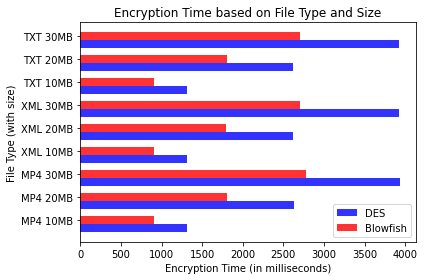

In [0]:
#create encryption bar graph
index=np.arange(9)
fig = plt.figure()
bar_width = 0.35
opacity = 0.8
rects1 = plt.barh(index, enc_data[0], bar_width,
alpha=opacity,
color='b',label="DES")

rects1 = plt.barh(index+bar_width, enc_data[1], bar_width,
alpha=opacity,
color='r',label="Blowfish")

plt.ylabel('File Type (with size)')
plt.xlabel('Encryption Time (in milliseconds)')
plt.title('Encryption Time based on File Type and Size')
plt.yticks(index + bar_width, ('MP4 10MB', 'MP4 20MB', 'MP4 30MB', 'XML 10MB','XML 20MB','XML 30MB','TXT 10MB','TXT 20MB','TXT 30MB'))
plt.legend()

plt.tight_layout()
plt.show()

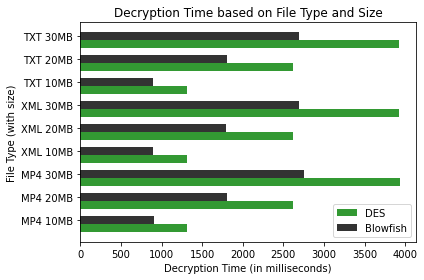

In [0]:
#create decryption bar graph
index=np.arange(9)
fig = plt.figure()
bar_width = 0.35
opacity = 0.8
rects1 = plt.barh(index, dec_data[0], bar_width,
alpha=opacity,
color='g',label="DES")

rects1 = plt.barh(index+bar_width, dec_data[1], bar_width,
alpha=opacity,
color='black',label="Blowfish")

plt.ylabel('File Type (with size)')
plt.xlabel('Decryption Time (in milliseconds)')
plt.title('Decryption Time based on File Type and Size')
plt.yticks(index + bar_width, ('MP4 10MB', 'MP4 20MB', 'MP4 30MB', 'XML 10MB','XML 20MB','XML 30MB','TXT 10MB','TXT 20MB','TXT 30MB'))
plt.legend()

plt.tight_layout()
plt.show()